In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
plotdata = {"batchsize": [], "loss": []}
def moving_average(a, w=10):
    if len(a) < w:
        return a[:]
    return [val if idx < w else sum(a[(idx-w):idx])/w for idx, val in enumerate(a)]

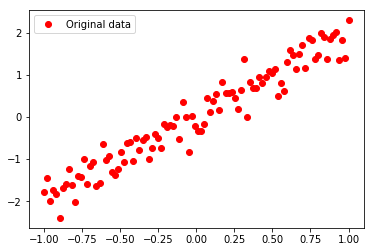

In [3]:
# 生成模拟数据
train_X = np.linspace(-1, 1, 100)
train_Y = 2 * train_X + np.random.randn(*train_X.shape) * 0.3  # y=2x，但是加入了噪声
# 图形显示
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.legend()
plt.show()

In [4]:
tf.reset_default_graph()

In [5]:
# 创建模型
# 占位符
X = tf.placeholder("float")
Y = tf.placeholder("float")
# 模型参数
W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.zeros([1]), name="bias")
# 前向结构
z = tf.multiply(X, W) + b

In [6]:
# 反向优化
cost = tf.reduce_mean(tf.square(Y - z))
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate).minimize(cost)  # Gradient descent

In [7]:
# 初始化变量
init = tf.global_variables_initializer()
# 参数设置
training_epochs = 20
display_step = 2
saver = tf.train.Saver()  # 生成saver
savedir = "log/"

Epoch: 1 cost= 0.67745566 W= [0.7789833] b= [0.3671382]
Epoch: 3 cost= 0.1333013 W= [1.6420349] b= [0.13867421]
Epoch: 5 cost= 0.08876364 W= [1.8763684] b= [0.05047864]
Epoch: 7 cost= 0.08584646 W= [1.9371482] b= [0.02718376]
Epoch: 9 cost= 0.085677564 W= [1.9528664] b= [0.02115243]
Epoch: 11 cost= 0.08567309 W= [1.9569306] b= [0.01959285]
Epoch: 13 cost= 0.085674524 W= [1.9579818] b= [0.01918949]
Epoch: 15 cost= 0.08567509 W= [1.958254] b= [0.01908503]
Epoch: 17 cost= 0.08567524 W= [1.9583237] b= [0.01905832]
Epoch: 19 cost= 0.08567528 W= [1.9583422] b= [0.01905121]
 Finished!
cost= 0.085675284 W= [1.9583454] b= [0.01904997]


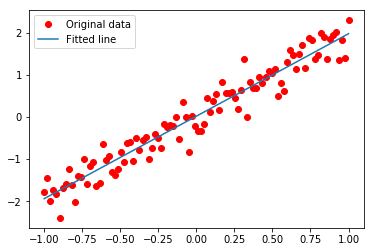

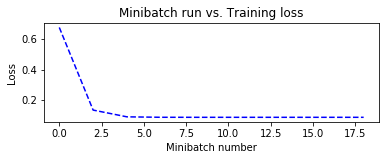

In [8]:
# 启动session
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # 显示训练中的详细信息
        if epoch % display_step == 0:
            loss = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
            print("Epoch:", epoch+1,
                  "cost=", loss,
                  "W=", sess.run(W),
                  "b=", sess.run(b))
            if not (loss == "NA"):
                plotdata["batchsize"].append(epoch)
                plotdata["loss"].append(loss)

    print(" Finished!")
    
    # 保存模型
    saver.save(sess, savedir+"linermodel.cpkt")
    
    print("cost=", sess.run(cost, feed_dict={X: train_X, Y: train_Y}),
          "W=", sess.run(W),
          "b=", sess.run(b))
    #print ("cost:",cost.eval({X: train_X, Y: train_Y}))

    # 图形显示
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    plotdata["avgloss"] = moving_average(plotdata["loss"])
    plt.figure(1)
    plt.subplot(211)
    plt.plot(plotdata["batchsize"], plotdata["avgloss"], 'b--')
    plt.xlabel('Minibatch number')
    plt.ylabel('Loss')
    plt.title('Minibatch run vs. Training loss')

    plt.show()

In [11]:
# 重启一个session
with tf.Session() as sess2:
    # 参数可以不初始化，因为初始化的值也会被restore的值给覆盖
    sess2.run(tf.global_variables_initializer())
    # 载入模型
    saver.restore(sess2, savedir+"linermodel.cpkt")
    print("x=0.2，z=", sess2.run(z, feed_dict={X: 0.2}))

INFO:tensorflow:Restoring parameters from log/linermodel.cpkt
x=0.2，z= [0.41071907]
